In [3]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# class folder should be in this directory containing train,valid,test folders having folders of roll
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

In [6]:
#image should have size 224*224 px
#change in classes with names of students
train_batches = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True

).flow_from_directory(train_path, target_size=(224,224),class_mode='categorical', batch_size=10)
valid_batches = ImageDataGenerator(
 rescale=1/255.0

).flow_from_directory(valid_path, target_size=(224,224),class_mode='categorical' , batch_size=5)
test_batches = ImageDataGenerator(
 rescale=1/255.0

).flow_from_directory(test_path, target_size=(224,224),class_mode='categorical', batch_size=5)


Found 320 images belonging to 16 classes.
Found 80 images belonging to 16 classes.
Found 80 images belonging to 16 classes.


In [7]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [8]:
imgs, labels = next(train_batches)

# Model

In [21]:
vgg16_model = keras.applications.vgg16.VGG16()

In [22]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:

type(vgg16_model)

keras.engine.training.Model

In [24]:

model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [26]:

model.layers.pop()

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:

for layer in model.layers[:-7]:
    layer.trainable = False

In [29]:
# parameter 2 can be change as no of output; in our case, no of student
model.add(Dense(16, activation='softmax'))

In [30]:

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Train_Model


In [31]:
 model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# steps_per_epoch= no of data/ size of batch
model.fit_generator(train_batches, steps_per_epoch=32, 
                    validation_data=valid_batches, validation_steps=1, epochs=40, verbose=2)

Epoch 1/40


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-0ed2932200be>", line 3, in <module>
    validation_data=valid_batches, validation_steps=1, epochs=40, verbose=2)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1732, in fit_generator
    initial_epoch=initial_epoch)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_generator.py", line 220, in fit_generator
    reset_metrics=False)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1514, in train_on_batch
    outputs = self.train_function(ins)
  File "C:\Users\aman2\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\backend

KeyboardInterrupt: 

# Predict

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


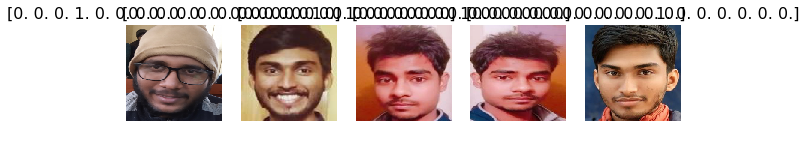

In [36]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [37]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
print(predictions)

[[0.06073244 0.06153129 0.06370725 0.06276571 0.06142271 0.06332815
  0.0614966  0.06561158 0.06209197 0.06304058 0.06194935 0.06320304
  0.06318261 0.06262105 0.06094529 0.06237034]
 [0.06294193 0.06166519 0.06210412 0.06174345 0.06221031 0.06087399
  0.06386293 0.06313628 0.06361471 0.0648893  0.05979294 0.06341302
  0.06081755 0.06477902 0.06301517 0.06114009]
 [0.06508888 0.06389122 0.06052718 0.06283741 0.06194925 0.06204413
  0.06305359 0.0639086  0.06140219 0.06559817 0.06083063 0.0610129
  0.06137126 0.06185523 0.06327789 0.06135153]
 [0.06564137 0.06372119 0.0603996  0.06257005 0.06227207 0.06146923
  0.06288552 0.0647681  0.06057776 0.065791   0.06078865 0.06075268
  0.06142123 0.06262902 0.06334658 0.060966  ]
 [0.06076343 0.06072152 0.063971   0.0614503  0.06202756 0.06139709
  0.06412821 0.06181605 0.06518239 0.06323087 0.06016802 0.06488671
  0.0610069  0.06498879 0.06231656 0.06194459]]
